Iteración 1: Error absoluto = 26.472538, Error relativo = 1.104543, Error cuadrático = 19.423952
Iteración 2: Error absoluto = 39.160835, Error relativo = 1.633951, Error cuadrático = 30.760143
Iteración 3: Error absoluto = 52.085070, Error relativo = 2.173204, Error cuadrático = 38.908864
Iteración 4: Error absoluto = 76.842372, Error relativo = 3.206180, Error cuadrático = 60.355278
Iteración 5: Error absoluto = 103.095161, Error relativo = 4.301555, Error cuadrático = 77.307102
Iteración 6: Error absoluto = 151.156839, Error relativo = 6.306886, Error cuadrático = 118.381881
Iteración 7: Error absoluto = 204.005849, Error relativo = 8.511964, Error cuadrático = 153.437245
Iteración 8: Error absoluto = 297.466361, Error relativo = 12.411522, Error cuadrático = 232.365192
Iteración 9: Error absoluto = 403.536367, Error relativo = 16.837199, Error cuadrático = 304.300060
Iteración 10: Error absoluto = 585.586862, Error relativo = 24.433096, Error cuadrático = 456.393590
Iteración 11: E

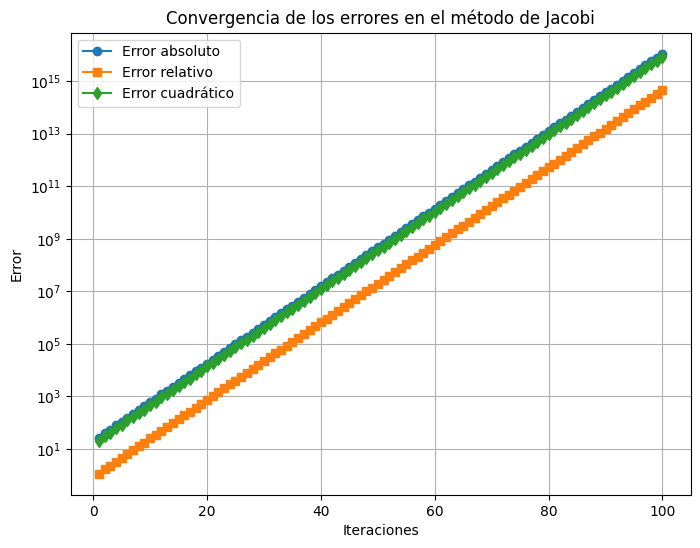

Solución aproximada: [-2.91853573e+12 -1.79774594e+14 -3.10209968e+14  1.64748803e+15
  8.26425188e+15 -6.17315500e+14]
Solución exacta: [  2.06985346   2.68963855   0.54103554  -2.5198957  -12.86704067
   3.27948913]


In [9]:

#   Codigo que implementa el esquema numerico
#   del metodo iterativo de Jacobi para
#   resolver sistemas de ecuaciones
#
#           Autor:
#   Dr. Ivan de Jesus May-Cen
#   imaycen@hotmail.com
#   Version 1.0 : 26/02/2025
#

import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones del ejemplo
A = np.array([[12, -2, 1, 0, 0, 0 ],
              [-3, 18, -4, 2, 0, 0],
              [1, -2, 16, -1, 1, 0],
              [0, 2, -1, 11, -3, 1],
              [ 0, -2, 4, 15, -2, 1],
              [ 0, 0, 1, -3, 2, 13]])

b = np.array([20, 35, -5, 19, -12, 25])

# Solución exacta para comparar errores
# Se añade esta linea para determinar
# una solución exacta para comparar errores
sol_exacta = np.linalg.solve(A, b)


# Criterio de paro
tolerancia = 1e-6
max_iter = 100

# Implementación del método de Jacobi
def jacobi(A, b, tol, max_iter):
    n = len(A)
    x = np.zeros(n)  # Aproximación inicial
    errores_abs = []
    errores_rel = []
    errores_cuad = []

    for k in range(max_iter):
        x_new = np.zeros(n)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i, i]

        # Calcular errores
        error_abs = np.linalg.norm(x_new - sol_exacta, ord=1)
        error_rel = np.linalg.norm(x_new - sol_exacta, ord=1) / np.linalg.norm(sol_exacta, ord=1)
        error_cuad = np.linalg.norm(x_new - sol_exacta, ord=2)

        errores_abs.append(error_abs)
        errores_rel.append(error_rel)
        errores_cuad.append(error_cuad)

        # Imprimir errores de la iteración
        print(f"Iteración {k+1}: Error absoluto = {error_abs:.6f}, Error relativo = {error_rel:.6f}, Error cuadrático = {error_cuad:.6f}")

        # Criterio de convergencia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break

        x = x_new

    return x, errores_abs, errores_rel, errores_cuad, k+1

# Ejecutar el método de Jacobi
sol_aprox, errores_abs, errores_rel, errores_cuad, iteraciones = jacobi(A, b, tolerancia, max_iter)

# Graficar los errores
plt.figure(figsize=(8,6))
plt.plot(range(1, iteraciones+1), errores_abs, label="Error absoluto", marker='o')
plt.plot(range(1, iteraciones+1), errores_rel, label="Error relativo", marker='s')
plt.plot(range(1, iteraciones+1), errores_cuad, label="Error cuadrático", marker='d')
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.yscale("log")
plt.title("Convergencia de los errores en el método de Jacobi")
plt.legend()
plt.grid()
plt.savefig("errores_jacobi.png")  # Guardar la figura en archivo PNG
plt.show()

# Mostrar la solución aproximada
print(f"Solución aproximada: {sol_aprox}")
print(f"Solución exacta: {sol_exacta}")


